#### This is a classification project that monitors the transaction data of a bank's customers and predicts which transaction may be a fraud!!?. At the end, the performance of the model is evaluated by using "K-Fold cross validation" methode.

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## data loading:

In [3]:
data = pd.read_csv('card_transdata.csv')
data


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [5]:
data.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [6]:
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data['fraud'].value_counts() / data.shape[0]

fraud
0.0    0.912597
1.0    0.087403
Name: count, dtype: float64

# data visualization:

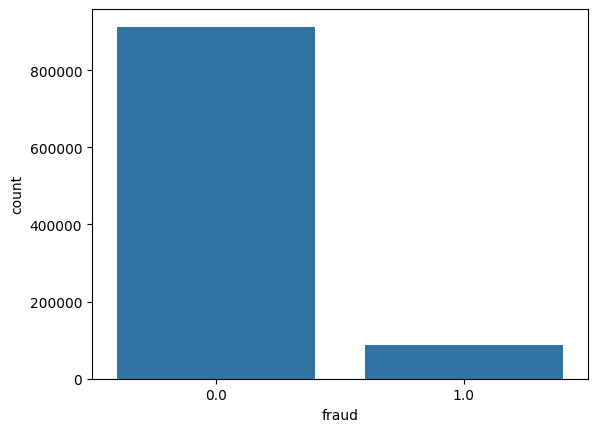

In [8]:
sns.countplot(x='fraud' , data=data);

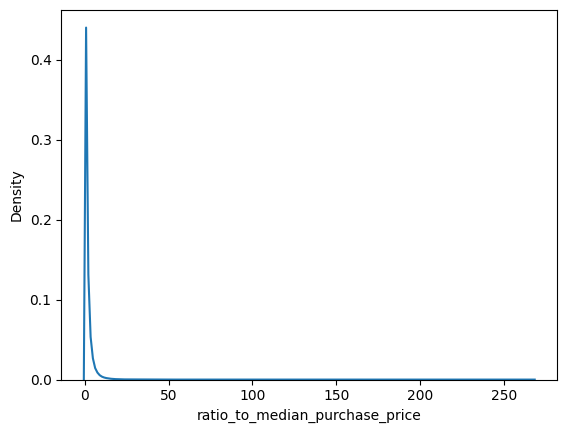

In [9]:
sns.kdeplot(x='ratio_to_median_purchase_price',
           data = data);

In [10]:
data[ data['ratio_to_median_purchase_price'] > 50]['fraud'].sum()

116.0

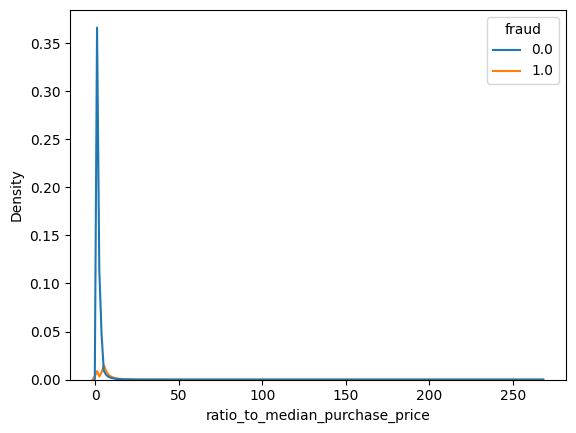

In [11]:
sns.kdeplot(x='ratio_to_median_purchase_price',
           data = data,
           hue = 'fraud');

In [12]:
data[data['ratio_to_median_purchase_price']>50]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
2848,1.800455,0.548887,65.150879,0.0,1.0,1.0,1.0,0.0
6565,28.762820,0.946693,61.032357,1.0,1.0,1.0,1.0,0.0
9684,12.111420,0.584949,56.374028,1.0,0.0,0.0,0.0,0.0
22177,135.359615,1.421151,50.245413,1.0,0.0,0.0,0.0,1.0
27091,6.351883,6.706575,57.770293,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
970267,7.828772,0.501492,68.379626,1.0,0.0,0.0,1.0,1.0
974086,2.894654,7.515153,57.155056,1.0,0.0,0.0,0.0,0.0
977360,21.931448,0.119436,99.117077,1.0,1.0,0.0,1.0,1.0
997803,40.188094,2.153282,126.713701,1.0,1.0,0.0,1.0,1.0


In [13]:
data[data['ratio_to_median_purchase_price']>50]['fraud'].sum()

116.0

<Axes: xlabel='ratio_to_median_purchase_price', ylabel='Density'>

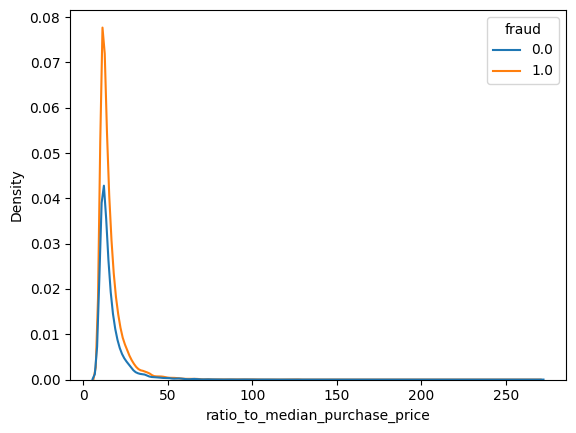

In [14]:
sns.kdeplot(x = 'ratio_to_median_purchase_price',
            data = data[data['ratio_to_median_purchase_price']>10],
           hue = 'fraud')

### در شکل بالا، توزیع فراد ینی نارنجیه نه اونقدر پرته ینی سمت راست نمودار. نه اونقدر به صفر نزدیکه ینی سمت چپ نمودار. ولی در شکل پایین، داده های زیر ده، فرادشون کمه توزیعش 

<Axes: xlabel='ratio_to_median_purchase_price', ylabel='Density'>

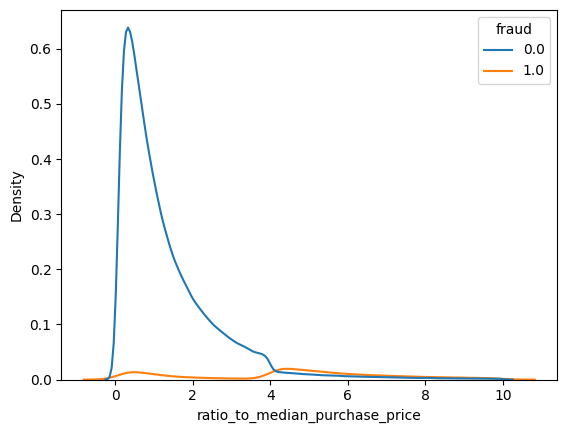

In [15]:
sns.kdeplot(x = 'ratio_to_median_purchase_price',
            data = data[data['ratio_to_median_purchase_price']<10],
           hue = 'fraud')

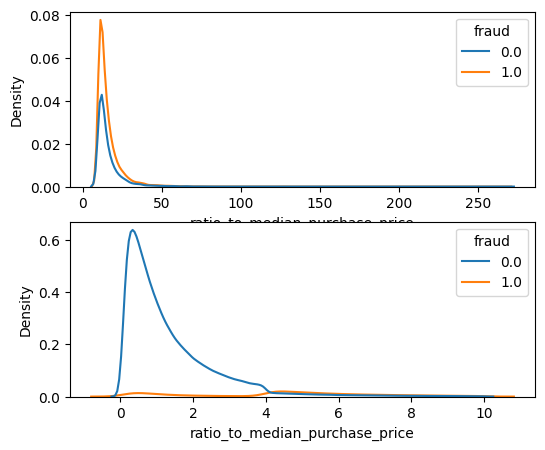

In [16]:
plt.figure(figsize=(6,5))
plt.subplot(211)
sns.kdeplot(x = 'ratio_to_median_purchase_price',
           data = data[data['ratio_to_median_purchase_price']>10],
           hue = 'fraud');


plt.subplot(212)
sns.kdeplot(x='ratio_to_median_purchase_price',
           data = data[data['ratio_to_median_purchase_price']<=10],
           hue = 'fraud');

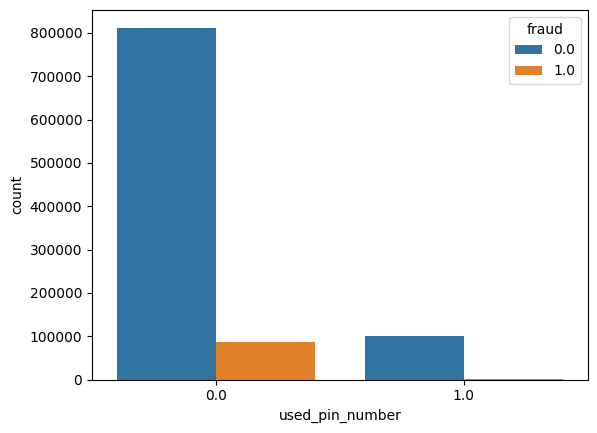

In [17]:
sns.countplot(x='used_pin_number',
             data=data,
             hue = 'fraud');

In [18]:
data[(data['fraud']==1) & (data['used_pin_number']==1)]['online_order'].sum()

272.0

In [19]:
data[(data['fraud']==1) & (data['used_pin_number']==1)]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
2642,223.038039,1.017896,7.041224,1.0,0.0,1.0,1.0,1.0
7383,6.167166,56.962256,7.240496,1.0,0.0,1.0,1.0,1.0
10943,392.369845,0.254992,5.832195,1.0,0.0,1.0,1.0,1.0
14192,383.472053,0.843807,5.611873,1.0,0.0,1.0,1.0,1.0
15374,2.069962,52.735588,8.160324,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
978665,532.135482,1.078814,45.406373,1.0,0.0,1.0,1.0,1.0
982478,110.129342,11.195667,4.254132,1.0,0.0,1.0,1.0,1.0
984884,111.529578,2.550624,15.138699,1.0,0.0,1.0,1.0,1.0
995256,406.633425,4.956463,7.912023,1.0,0.0,1.0,1.0,1.0


In [20]:
data[(data['fraud']==1) & (data['used_pin_number']==1)]['online_order'].sum()

272.0

# از 273 مورد تخلف 272 تاش انلاین بوده

# Model training

In [21]:
from sklearn.model_selection import train_test_split
X = data.drop(columns= ['fraud'])
Y = data['fraud']

x_train, x_test , y_train , y_test = train_test_split(X,Y,test_size=0.4)

print('اینا رو همیشه چک کن که ترتیبشون درست باشه:')
print('x_train shape is: {} , y_train shape is: {}' . format(x_train.shape , y_train.shape))

print('x_test shape\'s is: {} , y_test shape is: {}'.format( x_test.shape , y_test.shape
))


اینا رو همیشه چک کن که ترتیبشون درست باشه:
x_train shape is: (600000, 7) , y_train shape is: (600000,)
x_test shape's is: (400000, 7) , y_test shape is: (400000,)


In [22]:
from sklearn.tree import DecisionTreeClassifier as DTC

clf = DTC(criterion= 'entropy')
clf.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy')

In [23]:
from sklearn.metrics import f1_score , accuracy_score, precision_score
from sklearn.metrics import recall_score , confusion_matrix

In [24]:
y_pred = clf.predict(x_test)
accuracy_score(y_true = y_test , y_pred=y_pred)

0.9999825

In [25]:
precision_score(y_true = y_test , y_pred= y_pred)

1.0

In [26]:
recall_score(y_true = y_test , y_pred= y_pred)

0.9997991967871486

In [27]:
confusion_matrix(y_true = y_test , y_pred= y_pred)

array([[365140,      0],
       [     7,  34853]], dtype=int64)

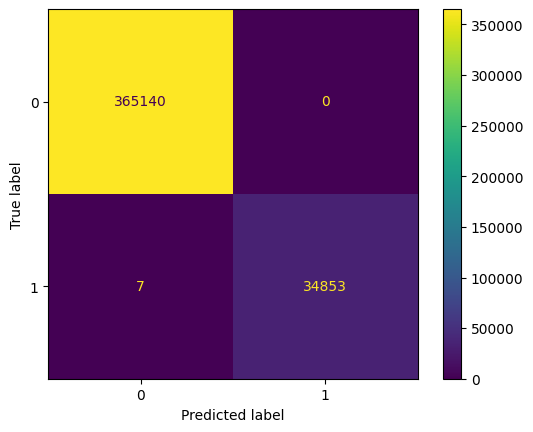

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_true = y_test , y_pred= y_pred)).plot();

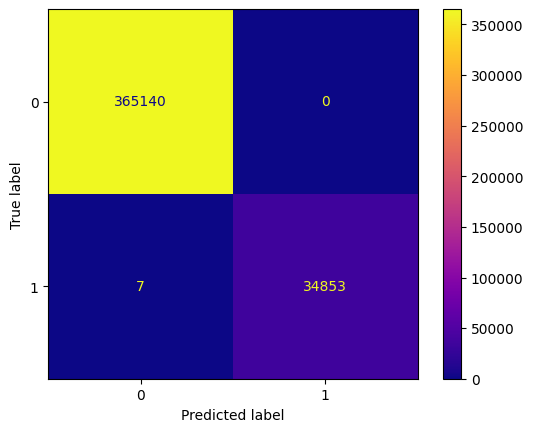

In [29]:
ConfusionMatrixDisplay(confusion_matrix(y_true = y_test ,
                                        y_pred= y_pred)).plot(cmap = 'plasma'); #رنگ دادی بهش

# K-fold:

In [54]:
from sklearn.model_selection import KFold
import numpy as np

F1=[]
kf = KFold(n_splits=5)
X = np.asanyarray(X)
a,b,c,d,e = kf.split(X)
for i,(train_index,test_index) in enumerate(kf.split(X)):
    x_train = X[train_index]
    y_train = Y[train_index]

    x_test = X[test_index]
    y_test = Y[test_index]
    
    clf = DTC (criterion='entropy')
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    F1.append(f1_score(y_true = y_test , y_pred = y_pred))
    print(i)

0
1
2
3
4


In [55]:
F1

[0.9998849053346377,
 0.9999713950627879,
 0.9999147945127667,
 0.9999139784946236,
 0.9999714293877318]

In [59]:
np.mean(F1)

0.9999313005585095

In [60]:
np.std(F1)

3.447582471681912e-05

In [61]:
np.var(F1)

1.188582489904836e-09

# report: 

In [63]:
print ('performance is: {} % +- {}'.format(np.mean(F1)*100 , np.std(F1)))

performance is: 99.99313005585095 % +- 3.447582471681912e-05
